<a href="https://colab.research.google.com/github/SibeleTatiana/WebAggregat/blob/main/GS_2%C2%B0_SEMESTRE_ESTATISTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Laís Branco Rios - RM 553600
 Diego Alves Moreira - RM 552603
 Sibele Tatiana Gonçalves do Amaral - RM 552915

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/dados_atmosfericos.csv', sep = ';', decimal = ',', encoding = 'latin1')
df


,data,hora,precipitacao_total,pressao_atmosferica,pressao_atmosferica_max,pressão_atmosferica_min,radiacao_global,temperatura_ar,temperatura_orvalho,temperatura_maxima,...,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_max,umidade_rel_min,umidade_rel,vento_direcao_horaria,vento_rajada,vento_velocidade_horaria,estacao,altitude
0,01/01/2022,0,0.0,921.7,921.7,921.0,NaN,19.3,19.3,19.4,...,19.4,19.3,100.0,100.0,100.0,299.0,1.4,0.4,SAO PAULO - INTERLAGOS,771.00
1,01/01/2022,1,0.0,921.6,922.0,921.6,NaN,19.3,19.3,19.5,...,19.5,19.2,100.0,100.0,100.0,98.0,1.7,0.7,SAO PAULO - INTERLAGOS,771.00
2,01/01/2022,2,0.0,921.7,921.9,921.5,NaN,19.3,19.3,19.4,...,19.4,19.2,100.0,100.0,100.0,286.0,2.4,0.7,SAO PAULO - INTERLAGOS,771.00
3,01/01/2022,3,0.0,921.5,921.7,921.4,NaN,19.0,19.0,19.3,...,19.2,18.8,100.0,100.0,100.0,330.0,2.4,0.7,SAO PAULO - INTERLAGOS,771.00
4,01/01/2022,4,0.2,920.7,921.5,920.7,NaN,18.6,18.6,19.0,...,19.0,18.4,100.0,100.0,100.0,331.0,1.8,0.7,SAO PAULO - INTERLAGOS,771.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2022,19,0.0,918.7,919.3,918.7,1763.7,24.6,20.6,26.2,...,22.6,20.1,91.0,74.0,78.0,323.0,4.9,1.2,SAO CARLOS,859.29
35036,31/12/2022,20,0.0,918.3,918.8,918.1,918.2,25.0,20.1,25.6,...,21.2,19.7,79.0,71.0,75.0,28.0,4.8,1.2,SAO CARLOS,859.29
35037,31/12/2022,21,0.0,918.8,919.0,918.1,204.6,23.6,19.9,25.0,...,20.2,19.1,80.0,72.0,80.0,167.0,4.0,0.0,SAO CARLOS,859.29
35038,31/12/2022,22,0.0,919.4,919.6,918.8,6.2,21.3,18.8,23.6,...,20.0,18.6,86.0,80.0,86.0,348.0,6.5,0.0,SAO CARLOS,859.29


1) [1 ponto] Obtenha o número e percentuais de missings (valores
faltantes) de cada coluna.

In [ ]:
# Obtendo o número de missings
num_missings = df.isnull().sum()

# Calculando o percentual de valores faltantes em cada coluna
porcentagem_missings = (df.isnull().sum() / len(df)) * 100

#Deixando o resultado bonitinho
dados_faltantes = pd.DataFrame({
    'Número de Valores Faltantes': num_missings,
    'Percentual de Valores Faltantes': porcentagem_missings
})
print(dados_faltantes)

                          Número de Valores Faltantes  \
data                                                0   
hora                                                0   
precipitacao_total                               1791   
pressao_atmosferica                              1309   
pressao_atmosferica_max                          1323   
pressão_atmosferica_min                          1323   
radiacao_global                                 16754   
temperatura_ar                                   1309   
temperatura_orvalho                              1314   
temperatura_maxima                               1324   
temperatura_minima                               1323   
temperatura_orvalho_max                          1323   
temperatura_orvalho_min                          1323   
umidade_rel_max                                  1323   
umidade_rel_min                                  1323   
umidade_rel                                      1314   
vento_direcao_horaria          

2) [1 ponto] Observe a existência de possíveis outliers para as variáveis:
precipitacao_total, temperatura_ar, umidade_rel e
“vento_velocidade_horaria”. Verifique também os outliers por estação.



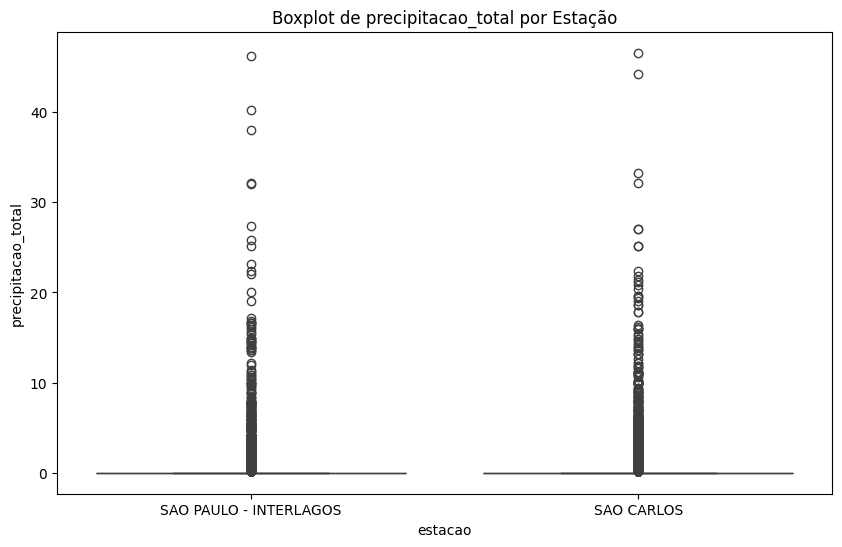

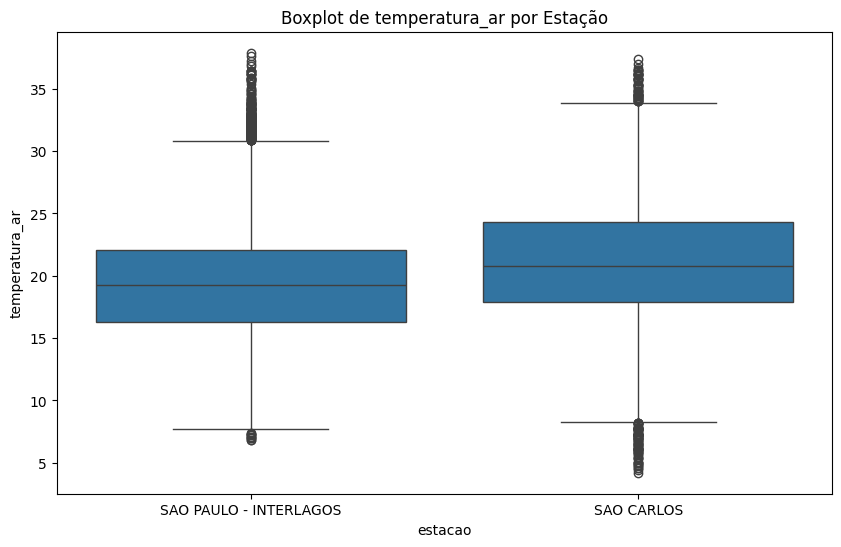

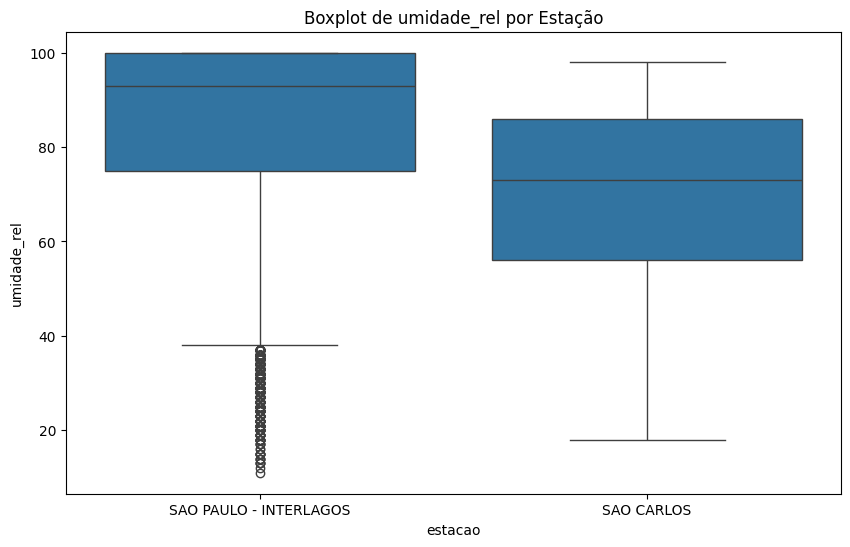

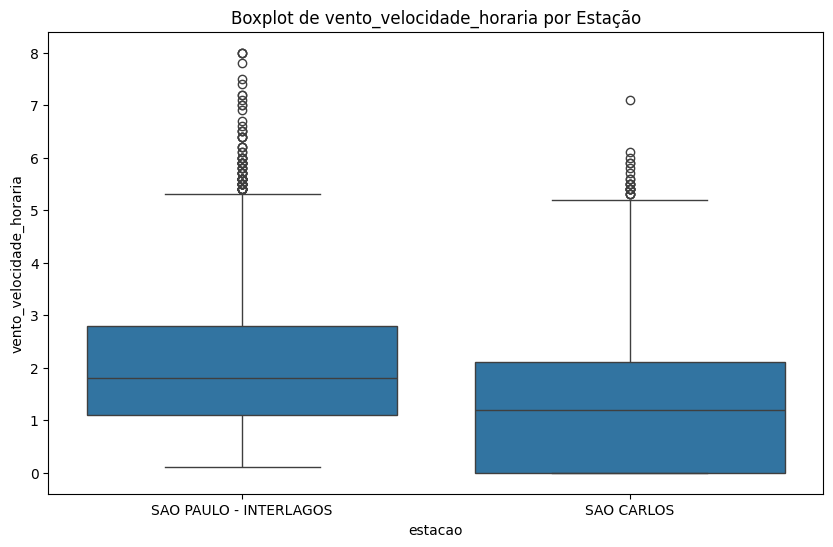

In [ ]:
# Variáveis de interesse
variaveis = ['precipitacao_total', 'temperatura_ar', 'umidade_rel', 'vento_velocidade_horaria']

# Boxplots para identificar outliers
for var in variaveis:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='estacao', y=var)
    plt.title(f'Boxplot de {var} por Estação')
    plt.show()


3) [3 pontos] Obtenha uma amostra simples aleatória de 10% do seu
dataframe e depois realize as seguintes análises:

a) Obtenha as medidas descritivas (média, desvio padrão, variância,
mediana, moda) do banco de dados original por estação para as
variáveis precipitacao_total, temperatura_ar.

b) Obtenha as medidas descritivas (média, desvio padrão, variância,
mediana, moda) da amostra aleatória por estação para as variáveis
precipitacao_total, temperatura_ar.

c) Compare os resultados. Sua amostra representou bem a população?


In [ ]:
#amostra de 10%
amostra = df.sample(frac=0.1, random_state=42)
amostra

,data,hora,precipitacao_total,pressao_atmosferica,pressao_atmosferica_max,pressão_atmosferica_min,radiacao_global,temperatura_ar,temperatura_orvalho,temperatura_maxima,...,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_max,umidade_rel_min,umidade_rel,vento_direcao_horaria,vento_rajada,vento_velocidade_horaria,estacao,altitude
11356,19/04/2023,4,1.0,917.7,918.4,917.6,NaN,17.9,17.9,18.2,...,18.2,17.9,100.0,100.0,100.0,257.0,3.3,1.0,SAO PAULO - INTERLAGOS,771.00
26543,11/01/2022,23,0.0,916.6,916.6,915.6,NaN,20.7,18.2,21.9,...,19.3,18.1,87.0,85.0,86.0,220.0,2.1,0.0,SAO CARLOS,859.29
2445,12/04/2022,21,0.0,923.6,923.6,923.2,77.0,21.7,21.5,22.3,...,21.6,21.0,99.0,93.0,99.0,128.0,7.2,1.8,SAO PAULO - INTERLAGOS,771.00
14649,03/09/2023,9,0.0,927.8,927.8,927.2,NaN,18.2,18.1,18.2,...,18.2,18.1,100.0,100.0,100.0,349.0,4.2,1.3,SAO PAULO - INTERLAGOS,771.00
32699,25/09/2022,11,0.0,922.4,922.5,921.7,907.4,20.0,11.7,20.0,...,11.7,10.4,64.0,59.0,59.0,343.0,9.6,4.6,SAO CARLOS,859.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31215,25/07/2022,15,0.0,925.3,926.2,925.3,2461.5,24.9,9.5,25.3,...,11.5,9.5,46.0,38.0,38.0,299.0,5.8,2.7,SAO CARLOS,859.29
217,10/01/2022,1,0.0,925.9,925.9,925.8,NaN,16.7,16.7,17.1,...,17.1,16.6,100.0,100.0,100.0,164.0,5.0,1.3,SAO PAULO - INTERLAGOS,771.00
25378,24/11/2023,10,0.0,922.1,922.1,921.3,128.6,20.3,18.6,20.4,...,18.6,18.5,90.0,90.0,90.0,120.0,8.2,2.4,SAO CARLOS,859.29
9676,08/02/2023,4,0.0,927.3,927.6,927.2,NaN,19.0,19.0,19.2,...,19.2,19.0,100.0,100.0,100.0,46.0,3.1,0.3,SAO PAULO - INTERLAGOS,771.00


a) Obtenha as medidas descritivas (média, desvio padrão, variância, mediana, moda) do banco de dados original por estação para as variáveis precipitacao_total, temperatura_ar.

b) Obtenha as medidas descritivas (média, desvio padrão, variância, mediana, moda) da amostra aleatória por estação para as variáveis precipitacao_total, temperatura_ar.

In [ ]:
# Função para calcular medidas descritivas
def descriptive_statistics(df, group_col, target_cols):
    stats = df.groupby(group_col)[target_cols].agg(['mean', 'std', 'var', 'median'])
    modes = df.groupby(group_col)[target_cols].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).rename(columns=lambda x: f'{x}_mode')
    combined = pd.concat([stats, modes], axis=1)
    return combined

#DataFrame original
desc_original = descriptive_statistics(df, 'estacao', ['precipitacao_total', 'temperatura_ar'])


#Amostra aleatória
desc_amostra = descriptive_statistics(amostra, 'estacao', ['precipitacao_total', 'temperatura_ar'])

print("Medidas descritivas do DataFrame original:", desc_original.to_string())
print("\nMedidas descritivas da amostra aleatória:", desc_amostra.to_string())


Medidas descritivas do DataFrame original:                         (precipitacao_total, mean)  (precipitacao_total, std)  (precipitacao_total, var)  (precipitacao_total, median)  (temperatura_ar, mean)  (temperatura_ar, std)  (temperatura_ar, var)  (temperatura_ar, median)  precipitacao_total_mode  temperatura_ar_mode
estacao                                                                                                                                                                                                                                                                             
SAO CARLOS                                0.175342                   1.317685                   1.736295                           0.0               21.013239               4.859340              23.613181                      20.8                      0.0                 20.0
SAO PAULO - INTERLAGOS                    0.169950                   1.229999                   1.512897                      

c) Compare os resultados. Sua amostra representou bem a população?

Resposta: Em geral, a amostra de 10% representou bem a população. O resultados que mais se diferenciaram foram os stds de 'precipitação total'.

4) [2 pontos] Em estudos anteriores, notou-se que a temperatura média
de São Paulo era 20ºC. Os pesquisadores acreditam que com o
aquecimento global e a poluição dos oceanos essa média tenha
mudado. Extraia uma amostra aleatória simples de 20% do dataframe
referentes à cidade de São Paulo e faça o teste de hipóteses (com
todos os passos necessários) com 95% de confiança.

5) [3 pontos] A temperatura da água do oceano em uma determinada
região, que é crucial para a sobrevivência de uma espécie específica
de peixe, segue uma distribuição normal com média de 15°C e desvio
padrão de 2°C. Estudos indicam que essa espécie de peixe sobrevive
melhor em temperaturas entre 13°C e 17°C.

a) Qual é a probabilidade de a temperatura da água estar abaixo de
13°C?

b) Qual é a probabilidade de a temperatura da água estar acima de 17°C?

c) Qual é a probabilidade de a temperatura da água estar entre 13°C e
17°C

In [ ]:
import scipy.stats as stats

mu = 15  # média
sigma = 2  # desvio padrão

# a) Probabilidade de a temperatura da água estar abaixo de 13°C
prob_a = stats.norm.cdf(13, mu, sigma)

# b) Probabilidade de a temperatura da água estar acima de 17°C
prob_b = 1 - stats.norm.cdf(17, mu, sigma)

# c) Probabilidade de a temperatura da água estar entre 13°C e 17°C
prob_c = stats.norm.cdf(17, mu, sigma) - stats.norm.cdf(13, mu, sigma)

print(f"a) Probabilidade de a temperatura da água estar abaixo de 13°C: {prob_a:.4f} ou {prob_a*100:.2f}%")
print(f"b) Probabilidade de a temperatura da água estar acima de 17°C: {prob_b:.4f} ou {prob_b*100:.2f}%")
print(f"c) Probabilidade de a temperatura da água estar entre 13°C e 17°C: {prob_c:.4f} ou {prob_c*100:.2f}%")


a) Probabilidade de a temperatura da água estar abaixo de 13°C: 0.1587 ou 15.87%
b) Probabilidade de a temperatura da água estar acima de 17°C: 0.1587 ou 15.87%
c) Probabilidade de a temperatura da água estar entre 13°C e 17°C: 0.6827 ou 68.27%
